<a href="https://colab.research.google.com/github/sindhu2508/sindhu2508/blob/main/Projectwork(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all the necessary libraries required
import glob
import glob, random, math, cv2
import random as rndm
import sympy as sp
import sys as sys_opn
import numpy as nparr
import keras as krs
from PIL import Image
import pickle as enc_b
import pandas as df_pd
import os as os_sys
import cv2 as cv_open
import matplotlib.pyplot as visual
import seaborn as disp_sea
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as conf_mat
from keras.models import Sequential as seq
from keras.layers import Dense as dnet
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam as gd_opt
from keras.utils.np_utils import to_categorical as enc_cat
from keras.layers import Dropout as drp
from keras.layers import Flatten as flt
from keras.layers.convolutional import Conv2D as base_conv_opn
from keras.layers.convolutional import MaxPooling2D as pool_2d_max
nparr.random.seed(0)
import tensorflow as tf

# Data Visualization

In [ ]:
class data_loader_and_visualization():
    def __init__(self, data_path):
        self.data_path = data_path #accesing variable from this class
    def data_loader(self):
        '''
        Input: take path
        output: returns Xtrain, ytrain, Xtest, ytest
        '''
        # loading the dataset
        self.classwise_folders = glob.glob(self.data_path + '*') # get classwise data folder
        self.no_of_classes = len(self.classwise_folders) # finding no of claases prersent in the dataset
        # finding classwise image count
        self.class_names, self.images_each_classes, self.labels, self.images = [], [], [], []
        for i in range(self.no_of_classes): # 0 then 1 
            ithclass = glob.glob(self.classwise_folders[i] + '/*.jpg')
            self.images.append(ithclass) # saving all the ith class images
            class_name = self.classwise_folders[i][len(self.data_path):]
            self.class_names.append(class_name)
            self.images_each_classes.append(len(self.images[i]))
            # creating the label #[1, 1, 1, 1, 1]*0 => [0, 0, 0, 0, 0], [1, 1, 1, 1]*1 => [1, 1, 1, 1]
            self.labels.append(list(nparr.ones(self.images_each_classes[i])*i))
        # now flattening the self.images 2D list into 1D list
        self.images = [temp_index for sublist in self.images for temp_index in sublist] # all the images name
        # X = ['s', 'h', 'y', 'p', 'k] ; Y = [1, 1, 0, 1, 0]
        '''
        X = [['s', 1]
            ['h', 1]
            ['y', 1]
            ['p', 1]
            ['k', 1]]
        Xtrain = [['s', 1]
            ['h', 1]
            ['y', 1]]
        #Xtrain = ['s', 'h', 'y']
        Xtest = [['p', 1]
            ['k', 1]]
        #Xtest = ['p', 'k']
        '''
        self.labels = [temp_index for sublist in self.labels for temp_index in sublist]

        # adding one extra column to perform train_test_split 
        # (X, y) # X must be in 2D, y must in 1D, X sample datas, Y -> it's correspoding labels 
        temp_data = []
        for i in range(0, len(self.images)):
            temp_data.append([self.images[i], 1])
        temp_data = nparr.array(temp_data)
        # test_size=0.1, means if had 100 images in total, 90 images used for training and 10 images used 
        # for tesing
        # 
        Xtrain, Xtest, ytrain, ytest = train_test_split(temp_data, self.labels, test_size=0.1, random_state=42)
        # removing the last column
        Xtrain_new, Xtest_new = [], []
        for i in range(0, Xtrain.shape[0]):
            Xtrain_new.append(Xtrain[i][0])
        for i in range(0, Xtest.shape[0]):
            Xtest_new.append(Xtest[i][0])
        return Xtrain_new, ytrain, Xtest_new, ytest
        # Xtrain_new #xtest_new

    def data_visualization(self):
        for ithclass in range(0, self.no_of_classes):
            print('class: ' + str(self.class_names[ithclass]) + ' has no of images: ' + str(self.images_each_classes[ithclass]))
        #====================== plotting these count in a bar plot  ==================================
        print('\n\n')
        horizental_line_length = self.no_of_classes*3 # multiplied with 3 (block size)
        fig = plt.figure(figsize = (horizental_line_length, 5)) # (6, 5)
        fig.tight_layout()
        # creating the bar plot
        plt.bar(self.class_names, self.images_each_classes, width = 0.4)
        plt.xlabel("Target Classes")
        plt.ylabel("No. of Images in each class")
        plt.title("Image distribution in different classes")
        # saving the image in pdf and png format
        plt.savefig('imageCount.pdf')
        plt.savefig('imageCount.png')
        plt.show()
        #=======================    show some sample images from each classes   ========================
        no_of_images_in_cols = 3 # no of columns in a particular class
        fig_, axs_ = visual.subplots(nrows = self.no_of_classes, ncols = no_of_images_in_cols, figsize = (10,10))
        fig_.tight_layout()
        # taking any random 'no_of_images_in_cols' no of images in each class
        show_images_name = [] # 2D list
        for img_counter in range(0, self.no_of_classes):
            # from glob fetch all the images names belongs to that particular class
            ith_class = list(glob.glob(self.classwise_folders[img_counter] + '/*.jpg'))
            # storing image path which have to be shown
            show_images_name.append(random.sample(ith_class, no_of_images_in_cols))
        '''
        show_images_name ===> [['a','b','c'],
                              ['e','d', 'f]]
        '''
        # plotting these images
        classnames = ['class 0: Ulcer-Not-Healthy', 'class 1: Healthy-Skin']
        for row in range(self.no_of_classes):
            for col in range(no_of_images_in_cols):
                # converting these images in the numpy array
                img = Image.open(show_images_name[row][col])
                imgdata = nparr.asarray(img) # 2d array 
                # storing these numpy image array in 2D array then plot
                axs_[row][col].imshow(imgdata)
                axs_[row][col].axis("off")
            axs_[row][math.floor(col/2)].set_title(classnames[row])
        plt.savefig('demo.pdf')
        plt.savefig('demo.png')
        plt.show()

In [ ]:
path_folder = '/content/drive/MyDrive/Patches/' # path to my drive google
data = data_loader_and_visualization(path_folder)

class: 0 has no of images: 512
class: 1 has no of images: 543





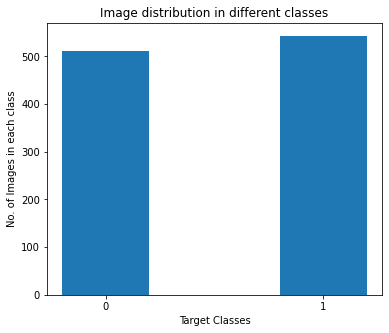

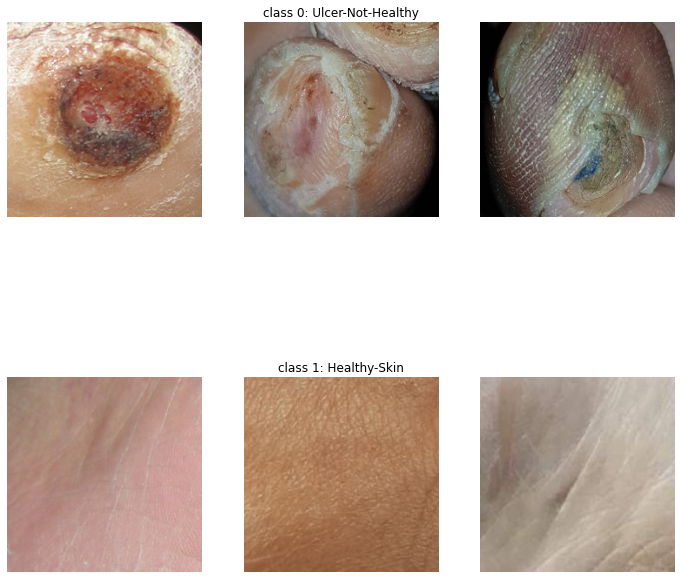

In [ ]:
Xtrain, ytrain, Xtest, ytest = data.data_loader()
data.data_visualization()

# EfficientNetB0

In [ ]:
#for efficient net the image size should be 224x224 
ulcer= glob.glob('/content/drive/MyDrive/Patches/0/*.*')
healthy= glob.glob('/content/drive/MyDrive/Patches/1/*.*')


dataset = []
targets = []
#taking each image from each folder and processing it to the desired size as 224x224 and also taking color scale as gray. 
#hence two loops used as 1st one for the folder 0 and 2nd one for the folder 1
#also seprating images in the dataset variable and labels in targets 
for i in ulcer:   
    im_dfu=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    im_dfu=nparr.array(im_dfu)
    dataset.append(im_dfu)
    targets.append(0) #class 0
for i in healthy:   
    im_dfu=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    im_dfu=nparr.array(im_dfu)
    dataset.append(im_dfu)
    targets.append(1) #class 1
dataset = nparr.array(dataset)
targets = nparr.array(targets)

In [ ]:
from sklearn.model_selection import train_test_split
#spliting the image into test and train. Test set contains 20% of the whole dataset

X_dfu_train, X_dfu_test, y_dfu_train, y_dfu_test = train_test_split(dataset, targets, test_size=0.2,random_state=142)

In [ ]:
y_dfu_train=enc_cat(y_dfu_train) #encoded binary target labels

In [ ]:
from tensorflow.keras import layers as lyrs
from tensorflow.keras.applications import EfficientNetB0 as eb0
from tensorflow.keras.applications import InceptionV3 as iv3
no_classes=2
#efficient net takes input as 3 channel rgb so input is given as 224x224x3
in_eff = lyrs.Input(shape=(224,224, 3))
#out will include weights none as it is going to train the custom dataset. but the weights can also be used as imagenet annotated images
out_eff = eb0(include_top=True, weights=None, classes=no_classes)(in_eff)

In [ ]:
#defining model and taking input and output together in the base model
model_efficentnet = tf.keras.Model(in_eff, out_eff)
#compiling model with binary loss function and gradient descent optimizer as adam
model_efficentnet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#realizing the model
model_efficentnet.summary()
#training the model
hist_eff = model_efficentnet.fit(X_dfu_train, y_dfu_train, epochs=30, verbose=2) #epoch 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
27/27 - 27s - loss: 0.9988 - accuracy: 0.8140 - 27s/epoch - 998ms/step
Epoch 2/30
27/27 - 8s - loss: 0.3650 - accuracy: 0.8732 - 8s/epoch - 284ms/step
Epoch 3/30
27/27 - 8s - loss: 0.2094 - accuracy: 0.9313 - 8s/epoch - 283ms/step
Epoch 4/30
27/27 - 8s - loss: 0.2050 - accuracy: 0.9242 - 8s/epoch - 284ms/step
Epoch 5/30
27/27 - 8s - loss: 0.1022 - accuracy: 0.9656 - 8s/epoch - 288ms/step
Epoch 6/30
27/27 - 8s - loss: 0.1179 - a

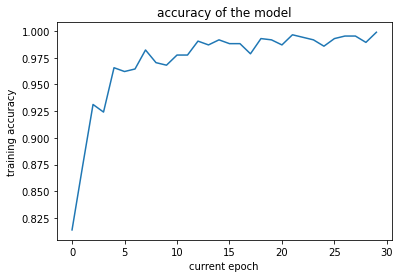

In [ ]:
#ploting accuracy vs epoch with matplotlib
def plot_accuracy(hist_eff):
    visual.plot(hist_eff.history["accuracy"])
    visual.title("accuracy of the model")
    visual.ylabel("training accuracy")
    visual.xlabel("current epoch")
    visual.show()

plot_accuracy(hist_eff)

In [ ]:
#one hot encoding of the test labels 
Y_dfu_test=enc_cat(y_dfu_test)

In [ ]:
#prediction of test accuracy
score_eff_net=model_efficentnet.evaluate(X_dfu_test,Y_dfu_test,verbose=0)
print('Test score:',score_eff_net[0])
print('Test accuracy:', score_eff_net[1])

Test score: 0.03796440362930298
Test accuracy: 0.9857819676399231


In [ ]:
#save the model
model_efficentnet.save("/content/drive/MyDrive/DFU/efficientnet_model.h5")

In [ ]:
#prediction of the labels for xtest and finding confusion matrix and classification report
predict_efficient= model_efficentnet.predict(X_dfu_test)
predicted_dfu_classes_efficient = nparr.argmax(predict_efficient, axis=1)

7/7 [==============================] - 2s 64ms/step


Text(114.0, 0.5, 'Truth')

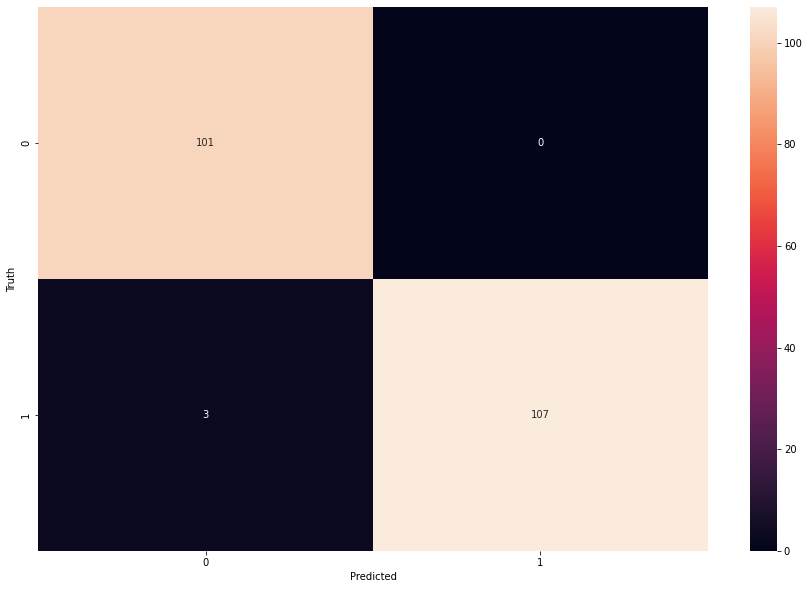

In [ ]:
#confusion matrix realization with seaborn
mat_con=conf_mat(y_dfu_test, predicted_dfu_classes_efficient)
visual.figure(figsize=(15,10))
disp_sea.heatmap(mat_con,annot=True,fmt='d')
visual.xlabel('Predicted')
visual.ylabel('Truth')

In [ ]:
#printing the classification report
print(classification_report(y_dfu_test, predicted_dfu_classes_efficient, target_names=['0-ulcer','1-Healthy']))

              precision    recall  f1-score   support

     0-ulcer       0.97      1.00      0.99       101
   1-Healthy       1.00      0.97      0.99       110

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211



# InceptionNet

In [ ]:
#for inception net the image size should be 299x299

ulcer= glob.glob('/content/drive/MyDrive/Patches/0/*.*')
healthy= glob.glob('/content/drive/MyDrive/Patches/1/*.*')


dataset = []
targets = []
#taking each image from each folder and processing it to the desired size as 299x299 and also taking color scale as gray. 
#hence two loops used as 1st one for the folder 0 and 2nd one for the forlder 1
#also seprating images in the dataset variable and labels in targets 
for i in ulcer:   
    im_dfu=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (299,299))
    im_dfu=nparr.array(im_dfu)
    dataset.append(im_dfu)
    targets.append(0)
for i in healthy:   
    im_dfu=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (299,299))
    im_dfu=nparr.array(im_dfu)
    dataset.append(im_dfu)
    targets.append(1)
dataset = nparr.array(dataset)
targets = nparr.array(targets)

In [ ]:
from sklearn.model_selection import train_test_split
#spliting the data into 20% test set and 80% train set 
X_dfu_train_inception, X_dfu_test_inception, y_dfu_train_inception, y_dfu_test_inception = train_test_split(dataset, targets, test_size=0.2,random_state=142)

In [ ]:
#one hot encoding of the input train labels
y_dfu_train_inception=enc_cat(y_dfu_train_inception)

In [ ]:
from tensorflow.keras.applications import InceptionV3
#inception net takes input as 3 channel rgb so input is given as 299x299x3
in_inception = lyrs.Input(shape=(299,299, 3))
#out will include weights none as we are going to train our custom dataset. else weights can be used as imagenet
out_inception = InceptionV3(include_top=True, weights=None, classes=no_classes)(in_inception)

In [ ]:
#defining model and taking input and output together in the base model

model_inception = tf.keras.Model(in_inception, out_inception)
#compiling model with binary loss function and gradient descent optimizer as adam

model_inception.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#realizing the model

model_inception.summary()
#training the model
hist_inception = model_inception.fit(X_dfu_train_inception, y_dfu_train_inception, epochs=30, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2)                 21806882  
                                                                 
Total params: 21,806,882
Trainable params: 21,772,450
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/30
27/27 - 29s - loss: 0.3341 - accuracy: 0.8614 - 29s/epoch - 1s/step
Epoch 2/30
27/27 - 13s - loss: 0.2148 - accuracy: 0.9230 - 13s/epoch - 472ms/step
Epoch 3/30
27/27 - 13s - loss: 0.1933 - accuracy: 0.9348 - 13s/epoch - 463ms/step
Epoch 4/30
27/27 - 12s - loss: 0.1584 - accuracy: 0.9491 - 12s/epoch - 451ms/step
Epoch 5/30
27/27 - 12s - loss: 0.1099 - accuracy: 0.9668 - 12s/epoch - 443ms/step
Epoch 6/30
27/27 - 12s - loss: 

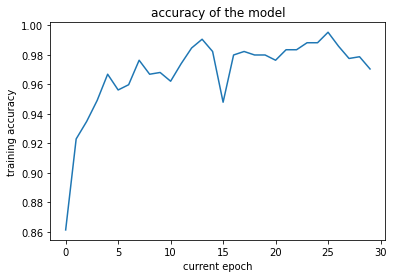

In [ ]:
#ploting accuracy vs epoch with matplotlib
def plot_accuracy(hist_inception):
    visual.plot(hist_inception.history["accuracy"])
    visual.title("accuracy of the model")
    visual.ylabel("training accuracy")
    visual.xlabel("current epoch")
    visual.show()

plot_accuracy(hist_inception)

In [ ]:
#one hot encoding of the test data
Y_dfu_test_inception=enc_cat(y_dfu_test_inception)

In [ ]:
#model accuracy from the test set
score_inception=model_inception.evaluate(X_dfu_test_inception,Y_dfu_test_inception,verbose=0)
print('Test score:',score_inception[0])
print('Test accuracy:', score_inception[1])

Test score: 105.56953430175781
Test accuracy: 0.47867298126220703


In [ ]:
#save the model
#model_inception.save("/content/drive/MyDrive/DFU/inception_model.h5")

In [ ]:
#prediction of the labels for xtest and finding confusion matrix and classification report
predict_inception = model_inception.predict(X_dfu_test_inception)
predicted_dfu_classes = nparr.argmax(predict_inception, axis=1)

7/7 [==============================] - 2s 116ms/step


In [ ]:
predicted_dfu_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(114.0, 0.5, 'Truth')

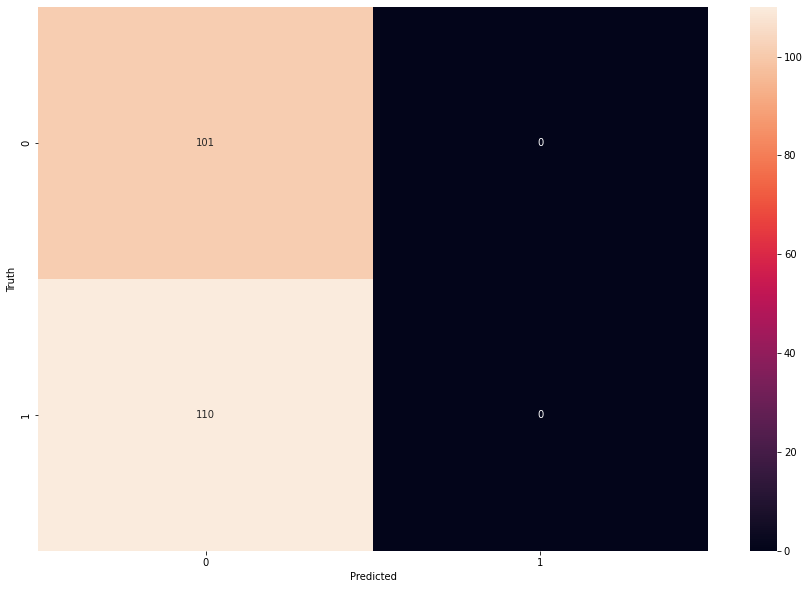

In [ ]:
#confusion matrix
mat_con=conf_mat(y_dfu_test_inception, predicted_dfu_classes)
visual.figure(figsize=(15,10))
disp_sea.heatmap(mat_con,annot=True,fmt='d')
visual.xlabel('Predicted')
visual.ylabel('Truth')

In [ ]:
#printing the classification report
print(classification_report(y_dfu_test_inception, predicted_dfu_classes, target_names=['0-ulcer','1-Healthy']))

              precision    recall  f1-score   support

     0-ulcer       0.48      1.00      0.65       101
   1-Healthy       0.00      0.00      0.00       110

    accuracy                           0.48       211
   macro avg       0.24      0.50      0.32       211
weighted avg       0.23      0.48      0.31       211



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VGG-16

In [ ]:
#for VGG-16 the image size should be 224x224 
ulcer= glob.glob('/content/drive/MyDrive/Patches/0/*.*')
healthy= glob.glob('/content/drive/MyDrive/Patches/1/*.*')


dataset = []
targets = []
#taking each image from each folder and processing it to the desired size as 224x224 and also taking color scale as rgb. 
#hence two loops used as 1st one for the folder 0 and 2nd one for the forlder 1
#also seprating images in the dataset variable and labels in targets 
for i in ulcer:   
    im_dfu=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    im_dfu=nparr.array(im_dfu)
    dataset.append(im_dfu)
    targets.append(0)
for i in healthy:   
    im_dfu=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    im_dfu=nparr.array(im_dfu)
    dataset.append(im_dfu)
    targets.append(1)
dataset = nparr.array(dataset)
targets = nparr.array(targets)

In [ ]:
from sklearn.model_selection import train_test_split
#spliting the image into test and train. test set contains 20% of the whole dataset

X_dfu_train_VGG, X_dfu_test_VGG, y_dfu_train_VGG, y_dfu_test_VGG = train_test_split(dataset, targets, test_size=0.2,random_state=142)

In [ ]:
y_dfu_train=enc_cat(y_dfu_train_VGG)

In [ ]:
def arch_VGG_16():
  arch = seq()
  DFU_classes = 2
  arch.add(base_conv_opn(64,(3,3), input_shape=(224,224, 3),activation='relu'))
  arch.add(base_conv_opn(64,(3,3),activation='relu'))
  arch.add(pool_2d_max(pool_size=(2,2)))
  arch.add(base_conv_opn(128,(3,3),activation='relu'))
  arch.add(base_conv_opn(128,(3,3),activation='relu'))
  arch.add(pool_2d_max(pool_size=(2,2)))
  arch.add(base_conv_opn(256,(3,3),activation='relu'))
  arch.add(base_conv_opn(256,(3,3),activation='relu'))
  arch.add(base_conv_opn(256,(3,3),activation='relu'))
  arch.add(pool_2d_max(pool_size=(2,2)))

  arch.add(base_conv_opn(512,(3,3),activation='relu'))
  arch.add(base_conv_opn(512,(3,3),activation='relu'))
  arch.add(base_conv_opn(512,(3,3),activation='relu'))
  arch.add(pool_2d_max(pool_size=(2,2)))

  
  arch.add(base_conv_opn(512,(3,3),activation='relu'))
  arch.add(base_conv_opn(512,(3,3),activation='relu'))
  arch.add(base_conv_opn(512,(3,3),activation='relu'))
  arch.add(pool_2d_max(pool_size=(2,2)))

  arch.add(flt())
  arch.add(dnet(4096,activation='relu'))
  arch.add(dnet(4096,activation='relu'))
  arch.add(dnet(4096,activation='relu')) 
  #arch.add(drp(0.5)) drops few neurons for the computations, not to complicate the model
  arch.add(dnet(1, activation='softmax'))
  arch.compile(gd_opt(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
  return arch

In [ ]:
arch=arch_VGG_16()
print(arch.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_95 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_97 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
X_train=X_dfu_train_VGG.reshape(844,224,224,3)

In [ ]:
hist_vgg=arch.fit(X_dfu_train_VGG, y_dfu_train_VGG, epochs=30, shuffle=1)

Epoch 1/30
27/27 [==============================] - 23s 521ms/step - loss: 26.8963 - accuracy: 0.5130
Epoch 2/30
27/27 [==============================] - 10s 358ms/step - loss: 0.6939 - accuracy: 0.5130
Epoch 3/30
27/27 [==============================] - 10s 358ms/step - loss: 0.6935 - accuracy: 0.5130
Epoch 4/30
27/27 [==============================] - 10s 358ms/step - loss: 0.6932 - accuracy: 0.5130
Epoch 5/30
27/27 [==============================] - 10s 358ms/step - loss: 0.6934 - accuracy: 0.5130
Epoch 6/30
27/27 [==============================] - 10s 358ms/step - loss: 0.7266 - accuracy: 0.5130
Epoch 7/30
27/27 [==============================] - 10s 358ms/step - loss: 1.5847 - accuracy: 0.5130
Epoch 8/30
27/27 [==============================] - 10s 358ms/step - loss: 0.8181 - accuracy: 0.5130
Epoch 9/30
27/27 [==============================] - 10s 359ms/step - loss: 0.7129 - accuracy: 0.5130
Epoch 10/30
27/27 [==============================] - 10s 358ms/step - loss: 0.6954 - accur

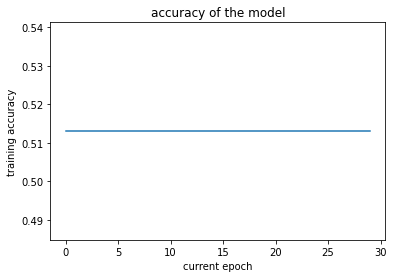

In [ ]:
#ploting accuracy vs epoch with matplotlib
def plot_accuracy(hist_vgg):
    visual.plot(hist_vgg.history["accuracy"])
    visual.title("accuracy of the model")
    visual.ylabel("training accuracy")
    visual.xlabel("current epoch")
    visual.show()

plot_accuracy(hist_vgg)

In [ ]:
#model accuracy from the test set
score_inception=arch.evaluate(X_dfu_test_VGG,y_dfu_test_VGG,verbose=0)
print('Test score:',score_inception[0])
print('Test accuracy:', score_inception[1])

Test score: 0.6924110054969788
Test accuracy: 0.521327018737793


In [ ]:
#prediction of the labels for xtest and finding confusion matrix and classification report
predict_vgg = arch.predict(X_dfu_test_VGG)

7/7 [==============================] - 1s 120ms/step


Text(114.0, 0.5, 'Truth')

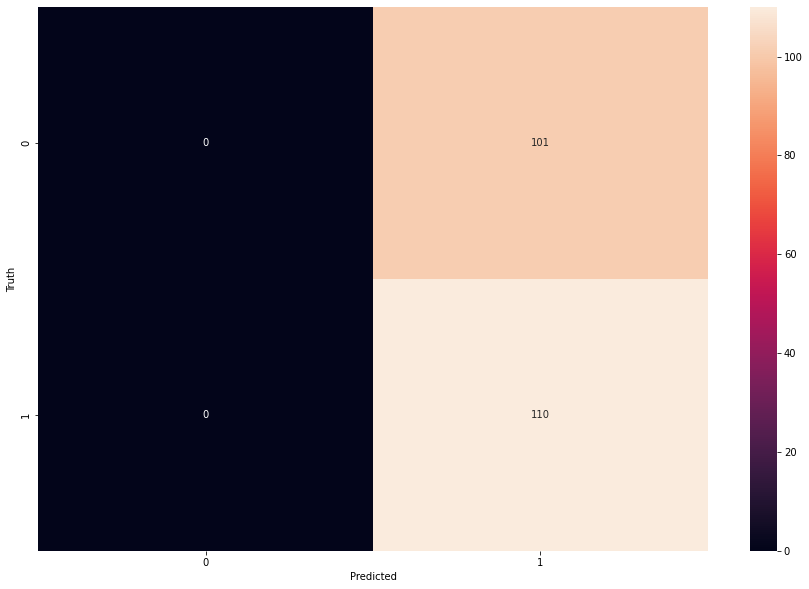

In [ ]:
#confusion matrix
mat_con=conf_mat(y_dfu_test_VGG, predict_vgg)
visual.figure(figsize=(15,10))
disp_sea.heatmap(mat_con,annot=True,fmt='d')
visual.xlabel('Predicted')
visual.ylabel('Truth')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#printing the classification report
print(classification_report(y_dfu_test_VGG, predict_vgg, target_names=['0-ulcer','1-Healthy']))

              precision    recall  f1-score   support

     0-ulcer       0.00      0.00      0.00       101
   1-Healthy       0.52      1.00      0.69       110

    accuracy                           0.52       211
   macro avg       0.26      0.50      0.34       211
weighted avg       0.27      0.52      0.36       211

